<a href="https://colab.research.google.com/github/helainytorres/RedesNeurais/blob/main/List3_Helainy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUC-Rio
## Departamento de Engenharia Elétrica
## Trabalho 3 - Mapas de Kohonen

Estudante: Helainy Torres

In [1]:
!git clone https://github.com/mdrs-thiago/minisom --quiet
import os
os.chdir('minisom')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

from minisom import MiniSom

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mdrs-thiago/PUC_Redes_Neurais/main/datasets/c_thyroid.csv')

In [4]:
values = dataset.values[:,:-1]

## Parte 1 - Testando configurações

Nesta primeira etapa, iremos investigar como a configuração do mapa pode mudar de acordo com a escolha de parâmetros.

##### 1. Escolha os parâmetros para o primeiro teste usando SOM. Para cada parâmetro, justifique sua escolha. Avalie o resultado.

In [7]:
dataset.head()

,ResinaT3,Torixina,Triiodotironina,TSH,Diff_TSH,target
0,107.0,10.1,2.2,0.9,2.7,1.0
1,113.0,9.9,3.1,2.0,5.9,1.0
2,127.0,12.9,2.4,1.4,0.6,1.0
3,109.0,5.3,1.6,1.4,1.5,1.0
4,105.0,7.3,1.5,1.5,-0.1,1.0


In [8]:
dataset['target'].value_counts()

1.0    150
2.0     35
3.0     30
Name: target, dtype: int64

Podemos observar que as classes estão desbalanceadas:

150 - normal


35 - hyper

30 - hipo

In [5]:
import seaborn as sns
sns.set()

O pairplot permite vizualisar uma possivel separação de grupos, e assim sugerir a quantidade de neurônios a utilizar.

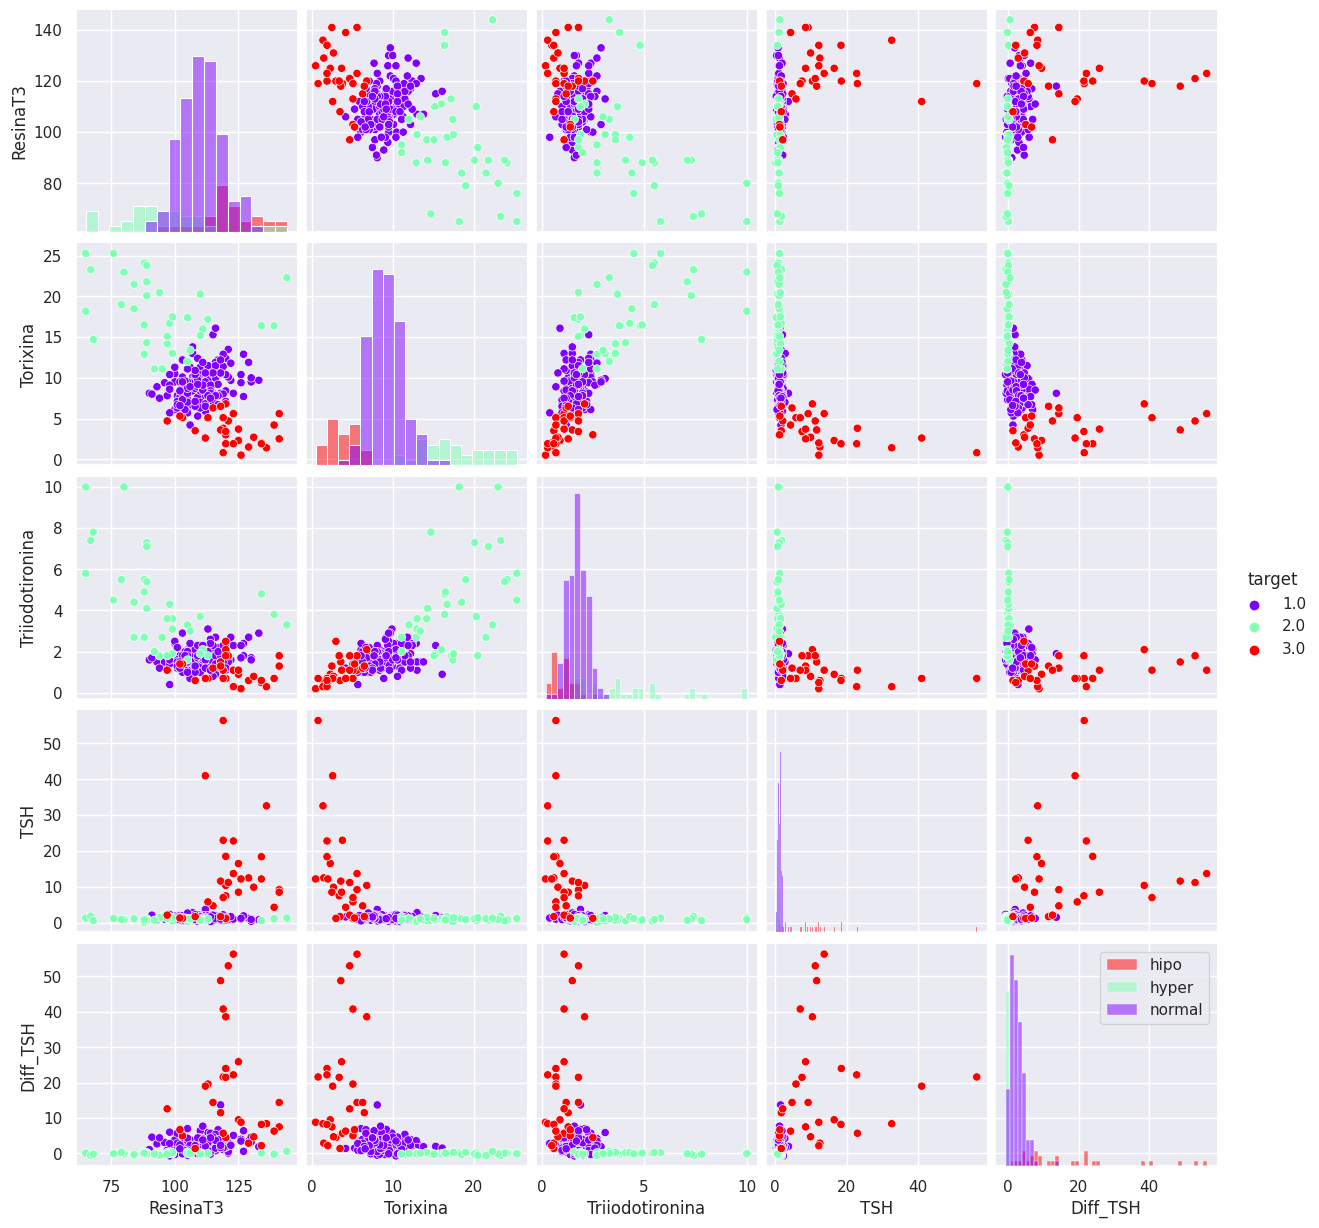

In [12]:
s = sns.pairplot(dataset, hue="target", diag_kind="hist",palette = "rainbow")
plt.legend(labels=['hipo','hyper','normal'])
plt.show ()

In [6]:
#decay function

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''

    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr

#Dimensão do vetor de entrada
input_len = values.shape[1]

Executando a rede com os parâmetros originais a fins comparativos

In [7]:
m = 10 #Dimensão X do mapa de Kohonen
n = 10 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.001 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0001 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000
finetuning_time = 10000
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values) #Normalização de dados min max

In [28]:
somOriginal = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
somOriginal.pca_weights_init(values)

somOriginal.train_random(X, ordering_time, verbose=True)

#print( f'Quantization error:   {somOriginal._quantization_error[-1]}')
print( f'Topographic error:    {somOriginal._topographic_error[-1]}')

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.4472319034102781
Topographic error:    0.018604651162790753


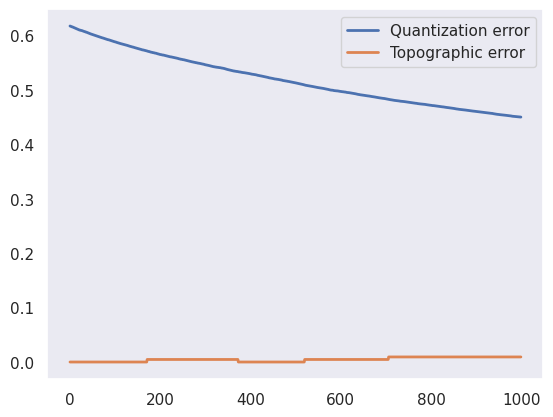

In [25]:
plt.plot(somOriginal._quantization_error,linewidth=2,label='Quantization error')
plt.plot(somOriginal._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

A dimensão escolhida para o mapa baseada no plair plot é próximo a 10 baseada na melhor separação de classes. Testamos a dimensão com 8 e 9 para avaliar o erro.


In [13]:
m = 8 #Dimensão X do mapa de Kohonen
n = 8 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.001 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0001 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000
finetuning_time = 10000
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values) #Normalização de dados min max

In [30]:
som8x8 = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som8x8.pca_weights_init(values)

som8x8.train_random(X, ordering_time, verbose=True)

#print( f'Quantization error:   {som8x8._quantization_error[-1]}')
print( f'Topographic error:    {som8x8._topographic_error[-1]}')

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.44539718143202844
Topographic error:    0.018604651162790753


In [11]:
m = 9 #Dimensão X do mapa de Kohonen
n = 9 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.001 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0001 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000
finetuning_time = 10000
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values) #Normalização de dados min max


In [35]:
som9x9 = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som9x9.pca_weights_init(values)

som9x9.train_random(X, ordering_time, verbose=True)

#print( f'Quantization error:   {som9x9._quantization_error[-1]}')
print( f'Topographic error:    {som9x9._topographic_error[-1]}')

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.4783588256531536
Topographic error:    0.0


<Figure size 1000x4000 with 0 Axes>

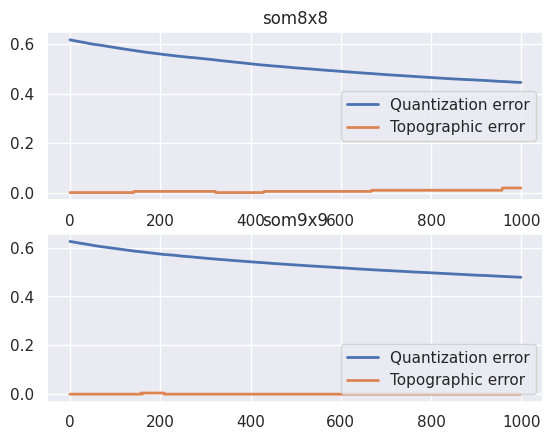

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 40))

plt.figure()
plt.subplot(211)
plt.title('som8x8')
plt.plot(som8x8._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som8x8._topographic_error,linewidth=2, label='Topographic error')
plt.legend()


plt.subplot(212)
plt.title('som9x9')
plt.plot(som9x9._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som9x9._topographic_error,linewidth=2, label='Topographic error')
plt.legend()

plt.show()


Podemos observar que alterando as dimensões da rede os erros de quantização diminuria:



1.   10x10 - Erro Quantizacao: 0.4472319034102781         Erro Topografico: 0.018604651162790753
2.    9x9  - Erro Quantizacao:  0.4783588256531536        Erro Topografico:  0.0
3.    8x8  - Erro Quantizacao: 0.44539718143202844         Erro Topografico: 0.018604651162790753

O erro topográfico é uma medida de quão bem o
SOM preserva a topologia dos dados de entrada no mapa. Ele indica a discrepância entre as posições
dos neurônios vizinhos no mapa e as relações de proximidade dos dados de entrada correspondentes.

O erro de quantização é uma medida da precisão com que o SOM mapeia os dados de entrada para os neurônios
vencedores correspondentes no mapa. Ele indica o quão bem o SOM consegue representar os valores dos dados de entrada.

Quanto maior o erro de quantização, menor a coesão dos neurônios com os dados de entrada.



In [12]:
#Taxa de aprendizado
som = MiniSom(8,8,input_len,learning_rate=0.5,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)
print( f'Topographic error:    {som._topographic_error[-1]}')


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.07233941309218457
Topographic error:    0.3162790697674419


Uma taxa de aprendizado muito baixa torna o aprendizado da rede muito lento, ao
passo que uma taxa de aprendizado muito alta provoca oscilações no treinamento e impede a convergência do processo de aprendizado. Como a setagem dos pesos inicial é aleatória, coloca-se  uma taxa de aprendizado maior no início para definir "mais rápido" os grupos, e com o passar do tempo, essa taxa de aprendizado vai diminuindo.

A taxa de aprendizado utilizada foi de 0.5 e o erro de quantização foi bem menor em comparação aos testes anteriores.

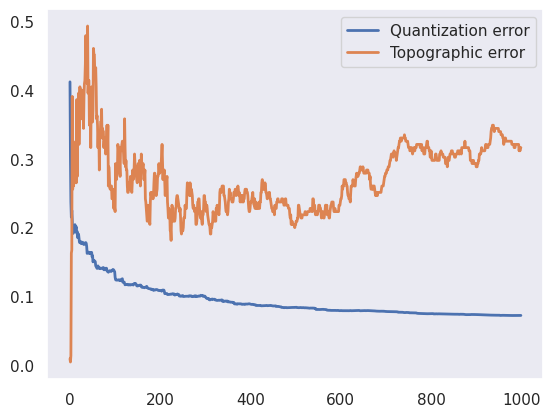

In [13]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.07247898997009936


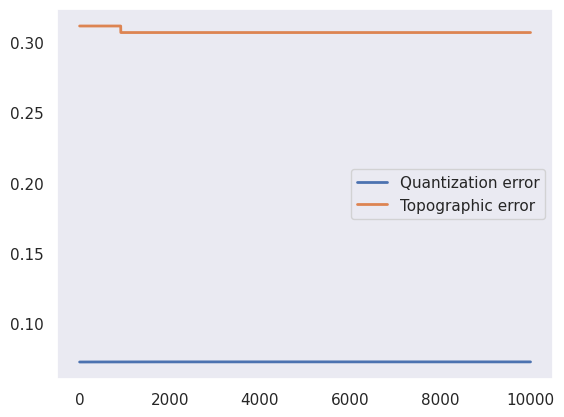

In [15]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning

som.train_random(X, finetuning_time, verbose=True)
print( f'Topographic error:    {som._topographic_error[-1]}')

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

0.28867513459481287


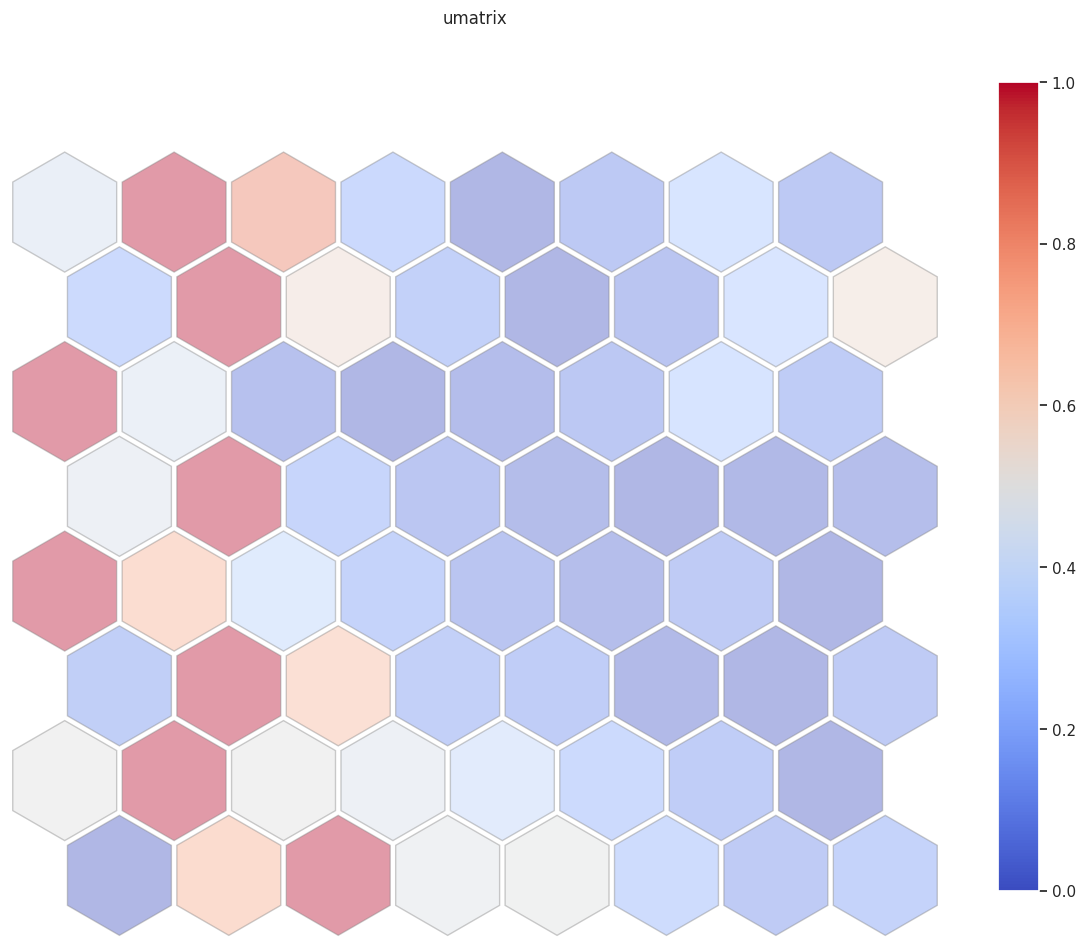

In [16]:
som.plot_umatrix()

In [17]:
features_names = ['ResinaT3', 'Torixina', 'Triiodotironina', 'TSH', 'Diff_TSH']

0.28867513459481287
0.28867513459481287
0.28867513459481287
0.28867513459481287
0.28867513459481287


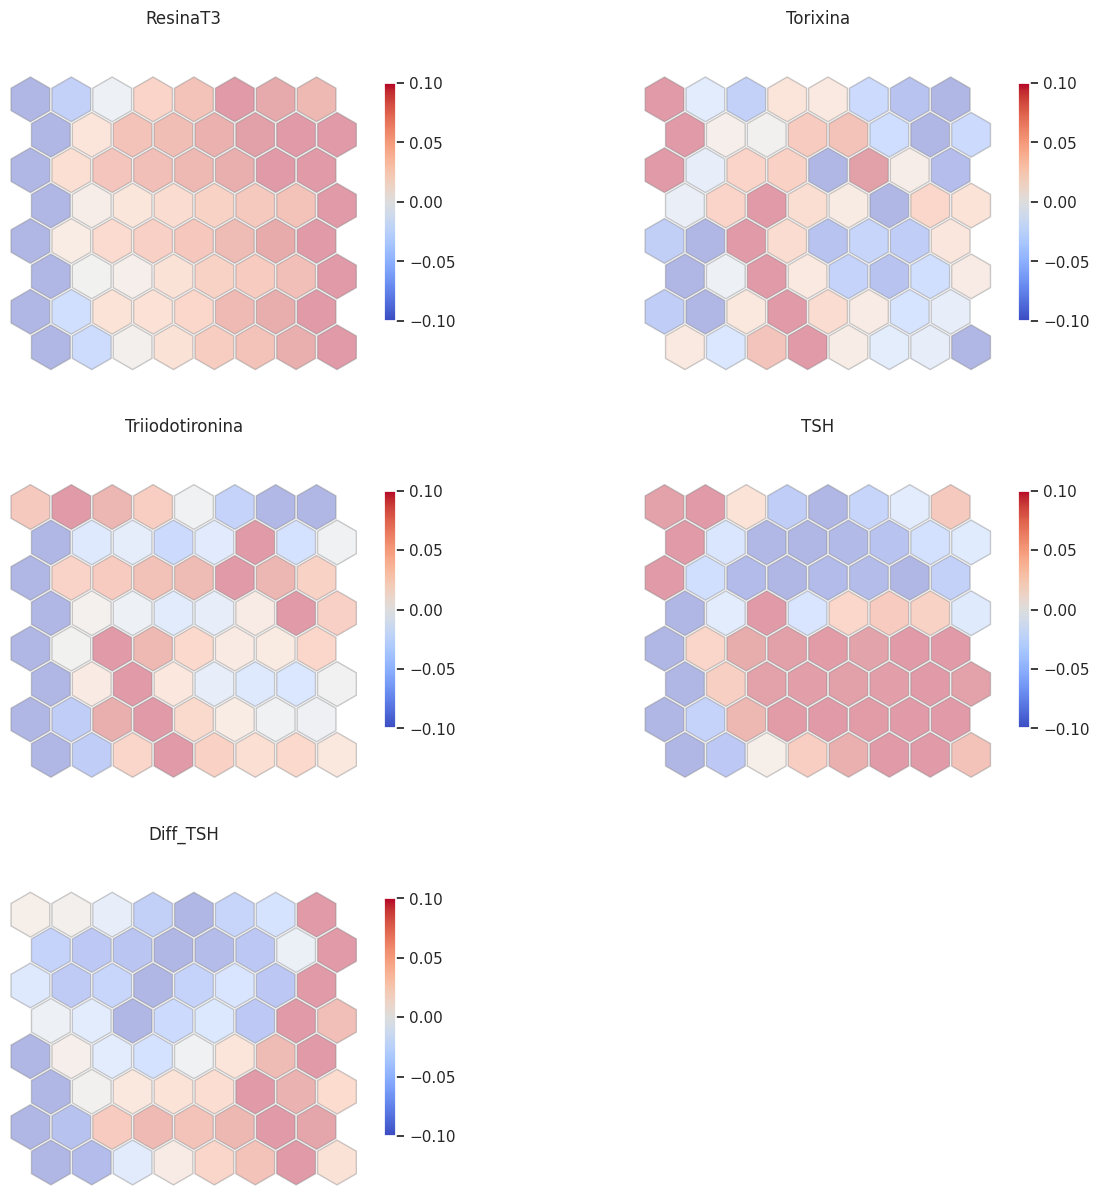

In [18]:
som.plot_map(nrows=3,ncols=2, feature_names=features_names)

Utilizando os dados pré-definidos na função de decaimento, percebe-se que o erro de quantização é maior que o erro topografico, gerando um mapa cujo não é possível verificar a separação dos grupos de forma
nítida, devido o erro de quantização ( quanto maior o erro de quantização, menor a coesão dos neurônios com os dados de entrada).

Porém, modificando os parâmetros lr_ordering e lr_finetuning, percebe-se que agora, o erro de quantização reduz de forma significante. Com a redução do erro topográfico, isso indica que os neurônios vizinhos
refletem os dados de entrada, refletindo no aumento do erro topográfico, já que há separação dos grupos.
Com essas modificações feitas, os grupos conseguem ser identificados através do mapa

##### 2. Modifique a topologia da rede. Teste diferentes valores e avalie o resultado.

In [20]:
m = 8 #Dimensão X do mapa de Kohonen
n = 8 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.001 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0001 #Taxa de aprendizado - Finetuning phase

topology = "rectangular"

ordering_time = 1000
finetuning_time = 10000
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

In [22]:
som = MiniSom(m,n,input_len,learning_rate=0.5,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)
print( f'Topographic error:    {som._topographic_error[-1]}')

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.06997456280105416
Topographic error:    0.09302325581395349


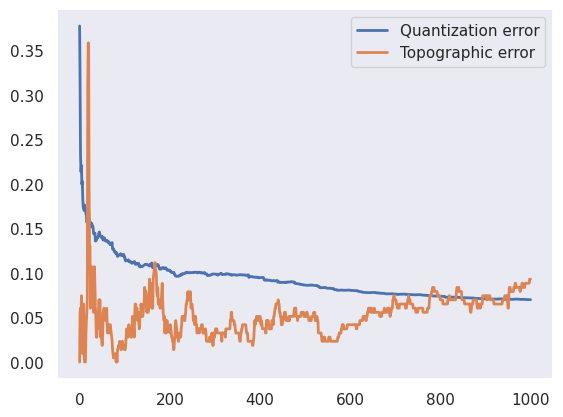

In [23]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

In [26]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning

som.train_random(X, finetuning_time, verbose=True)
print( f'Topographic error:    {som._topographic_error[-1]}')

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.07005623672180974
Topographic error:    0.09302325581395349


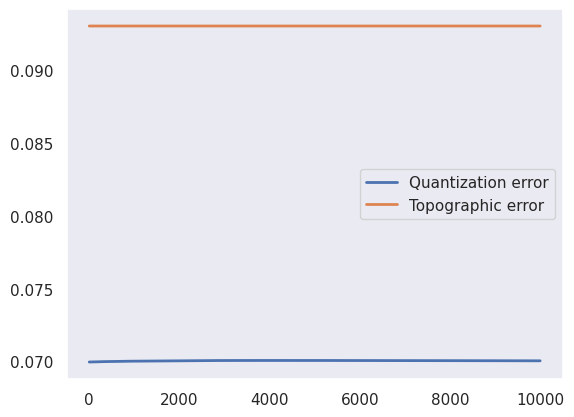

In [27]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

In [28]:
features_names = ['ResinaT3', 'Torixina', 'Triiodotironina', 'TSH', 'Diff_TSH']

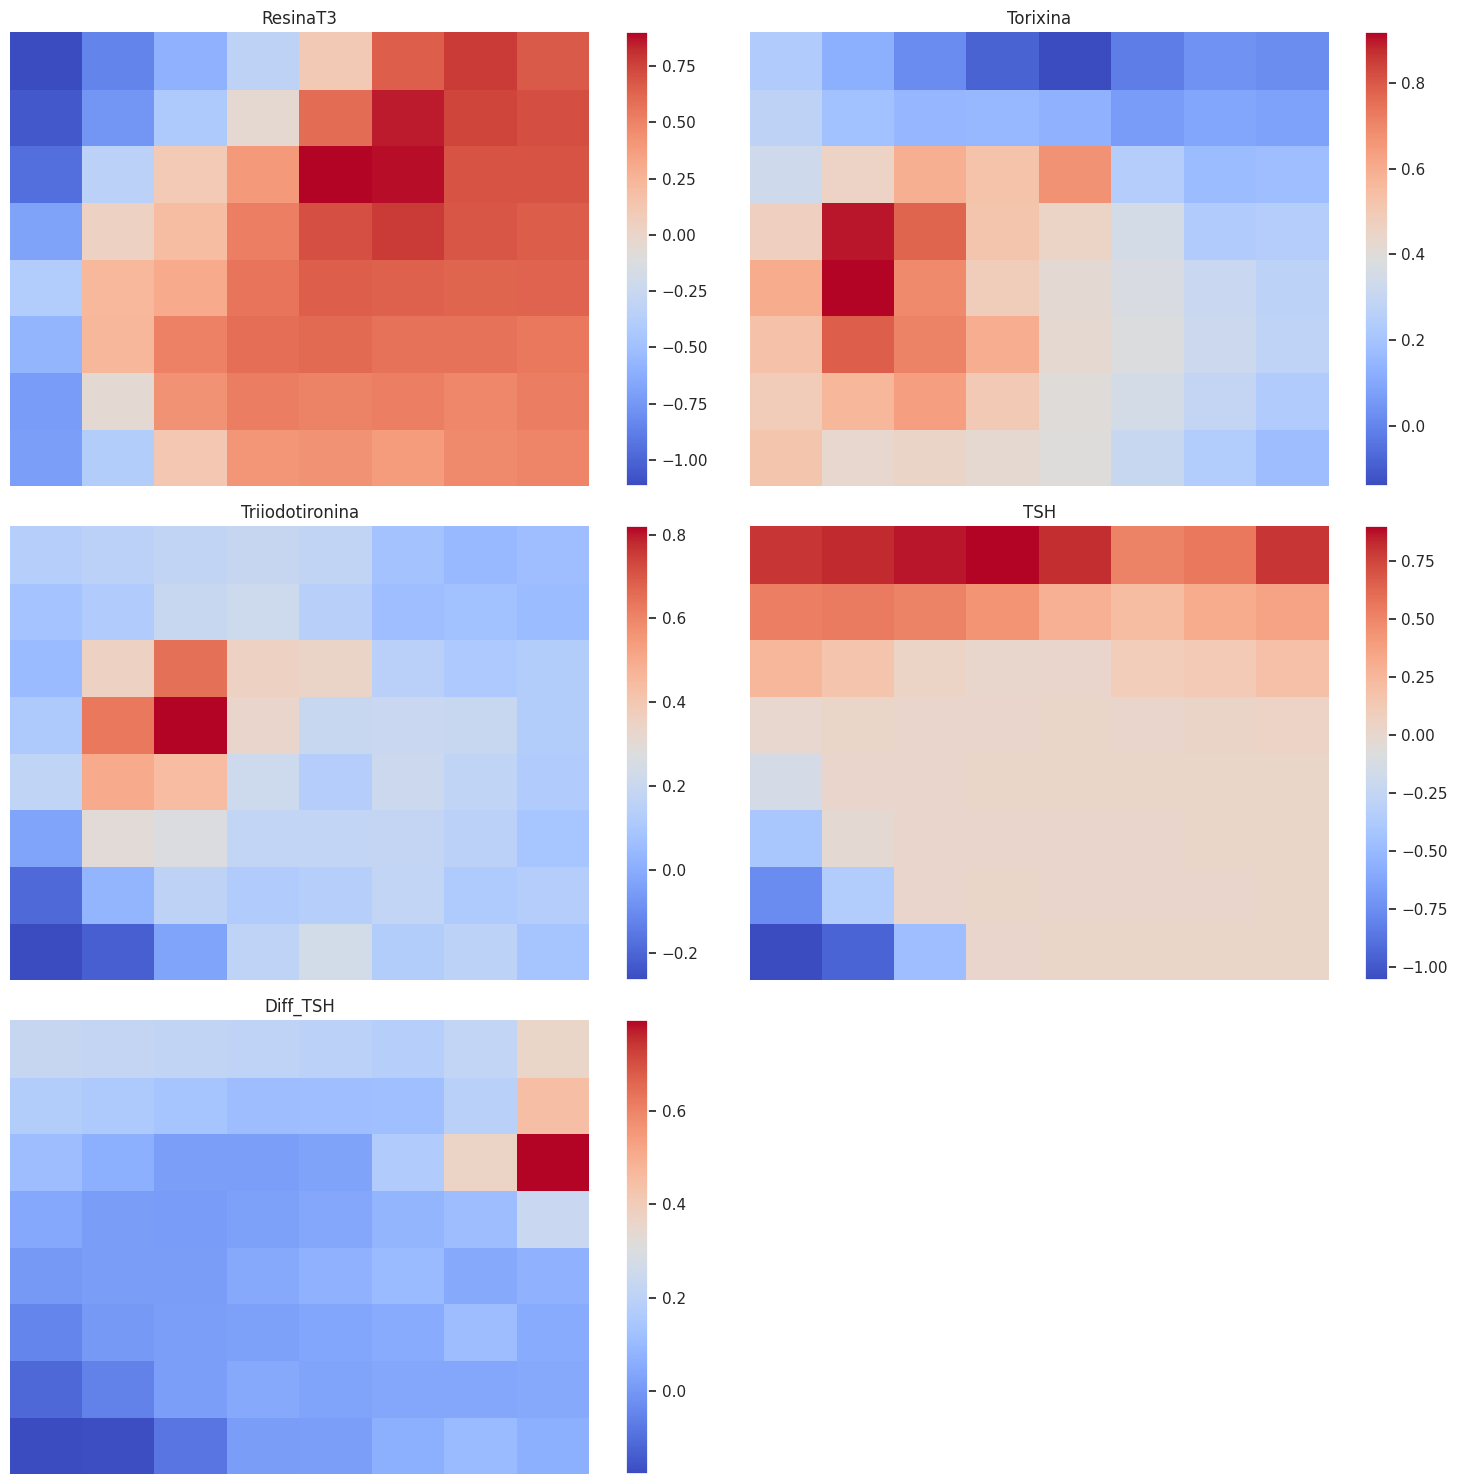

In [29]:
som.plot_map(nrows=3,ncols=2, feature_names=features_names)

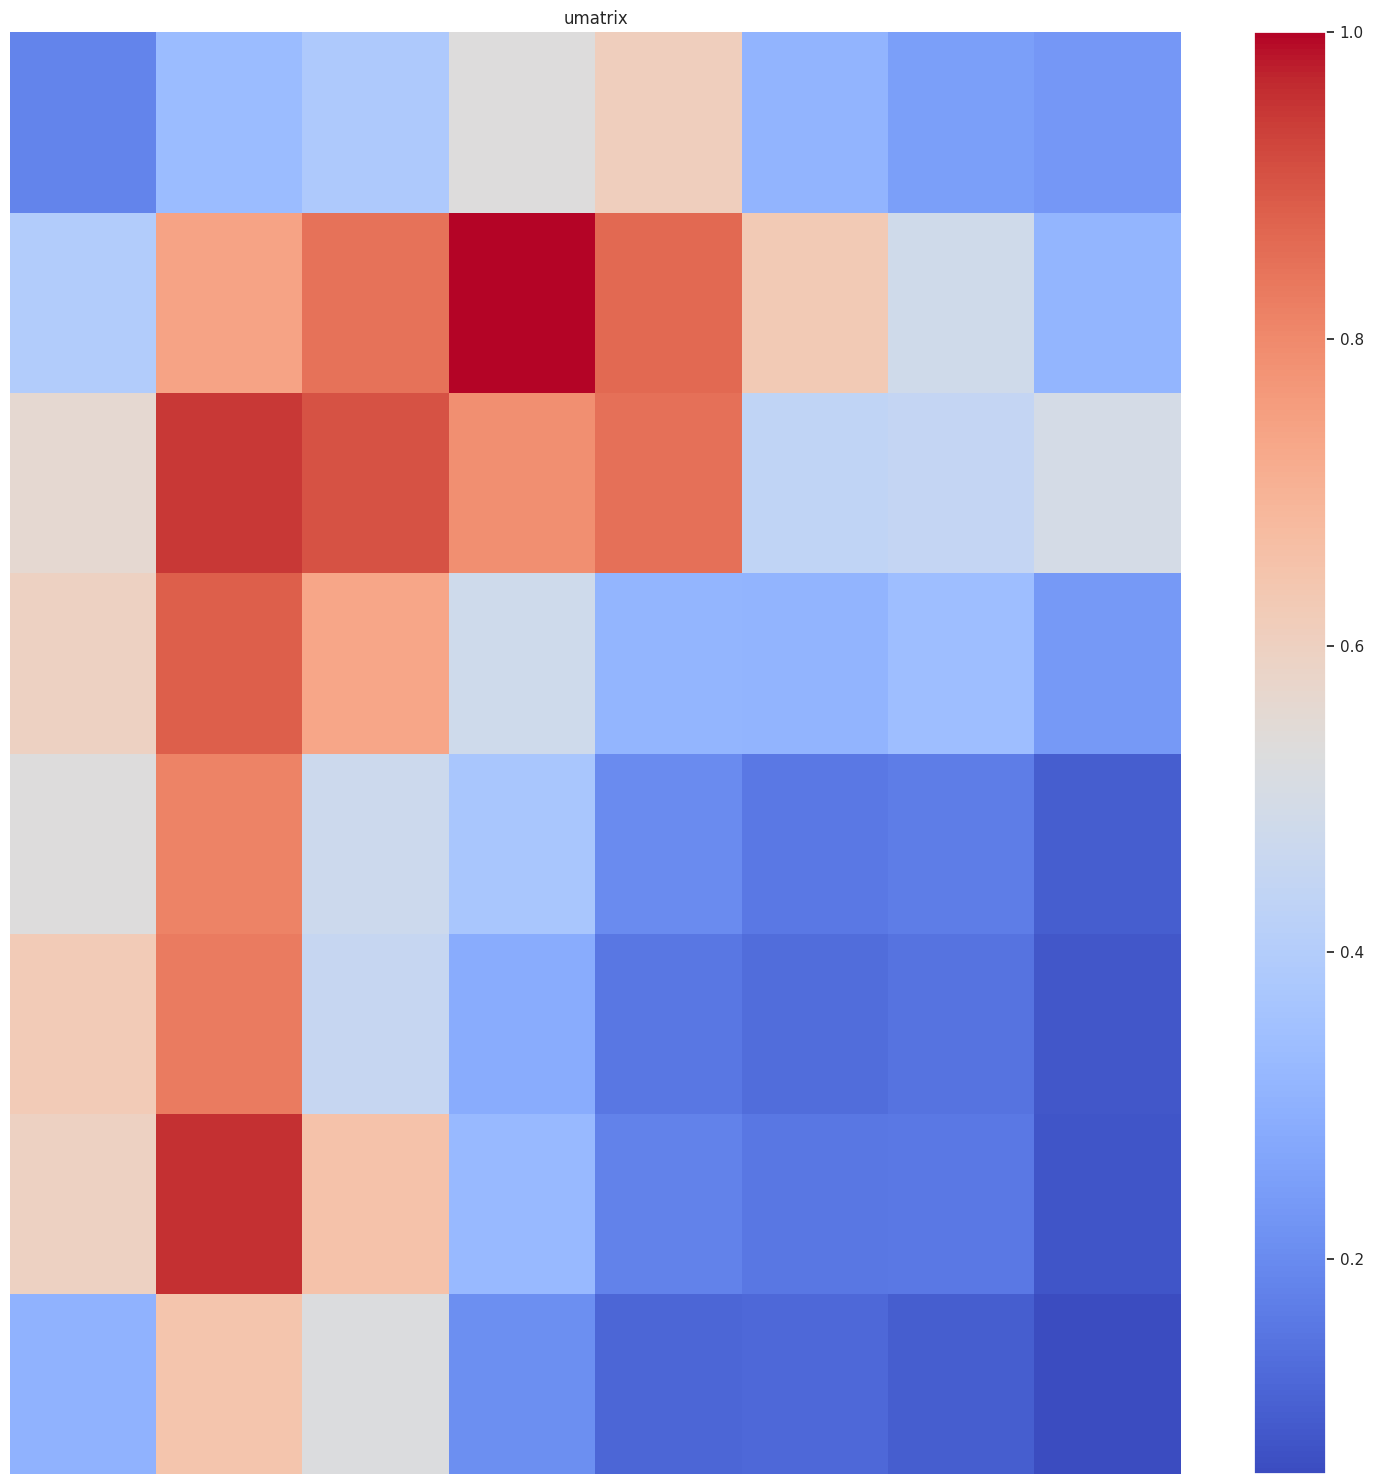

In [30]:
som.plot_umatrix()


A topologia foi alterada de hexagonal para rectangular e dessa forma foi possivel identificar uma melhor separação de grupos.

##### 3. Modifique a normalização dos dados de entrada e avalie o resultado obtido. Esta mudança tem algum efeito no mapa gerado?

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X = scaler.fit_transform(values)  #Mudando normalizacao

In [12]:
m = 8 #Dimensão X do mapa de Kohonen
n = 8 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.001 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0001 #Taxa de aprendizado - Finetuning phase

topology = "rectangular"

ordering_time = 1000
finetuning_time = 10000
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

In [13]:
somN1 = MiniSom(m,n,input_len,learning_rate=0.5,topology=topology,decay_function=decay_fcn)
somN1.pca_weights_init(values)

#somN1.train_random(X, ordering_time, verbose=True)

somN1._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning

somN1.train_random(X, finetuning_time, verbose=True)
print( f'Topographic error:    {somN1._topographic_error[-1]}')

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 1.2811496085260667
Topographic error:    0.018604651162790697


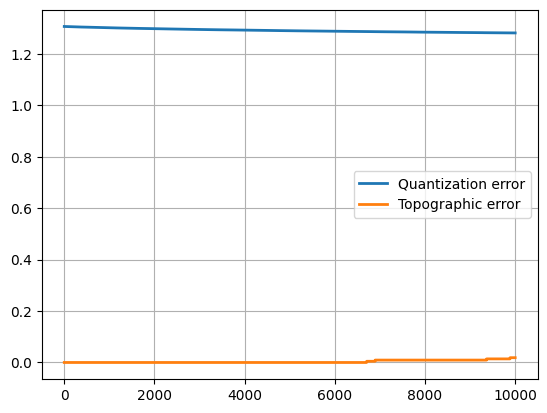

In [14]:
plt.plot(somN1._quantization_error,linewidth=2,label='Quantization error')
plt.plot(somN1._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

O erro de quantização aumentou ao alterarmos a normalização.
Erro de quantização passou de 0.0700 para 1.2805

Teste sem normalização alguma.

In [19]:
X=values #Considerando X com os valores absolutos,sem a normalização:

In [24]:
print(X)

[[107.   10.1   2.2   0.9   2.7]
 [113.    9.9   3.1   2.    5.9]
 [127.   12.9   2.4   1.4   0.6]
 ...
 [103.    5.1   1.4   1.2   5. ]
 [ 97.    4.7   1.1   2.1  12.6]
 [102.    5.3   1.4   1.3   6.7]]


In [40]:
somN2 = MiniSom(m,n,input_len,learning_rate=0.5,topology=topology,decay_function=decay_fcn)
somN2.pca_weights_init(values)

#somN2.train_random(X, ordering_time, verbose=True)

somN2._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning

somN2.train_random(X, finetuning_time, verbose=True)
print( f'Topographic error:    {somN2._topographic_error[-1]}')

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 63.96603060553761
Topographic error:    0.0


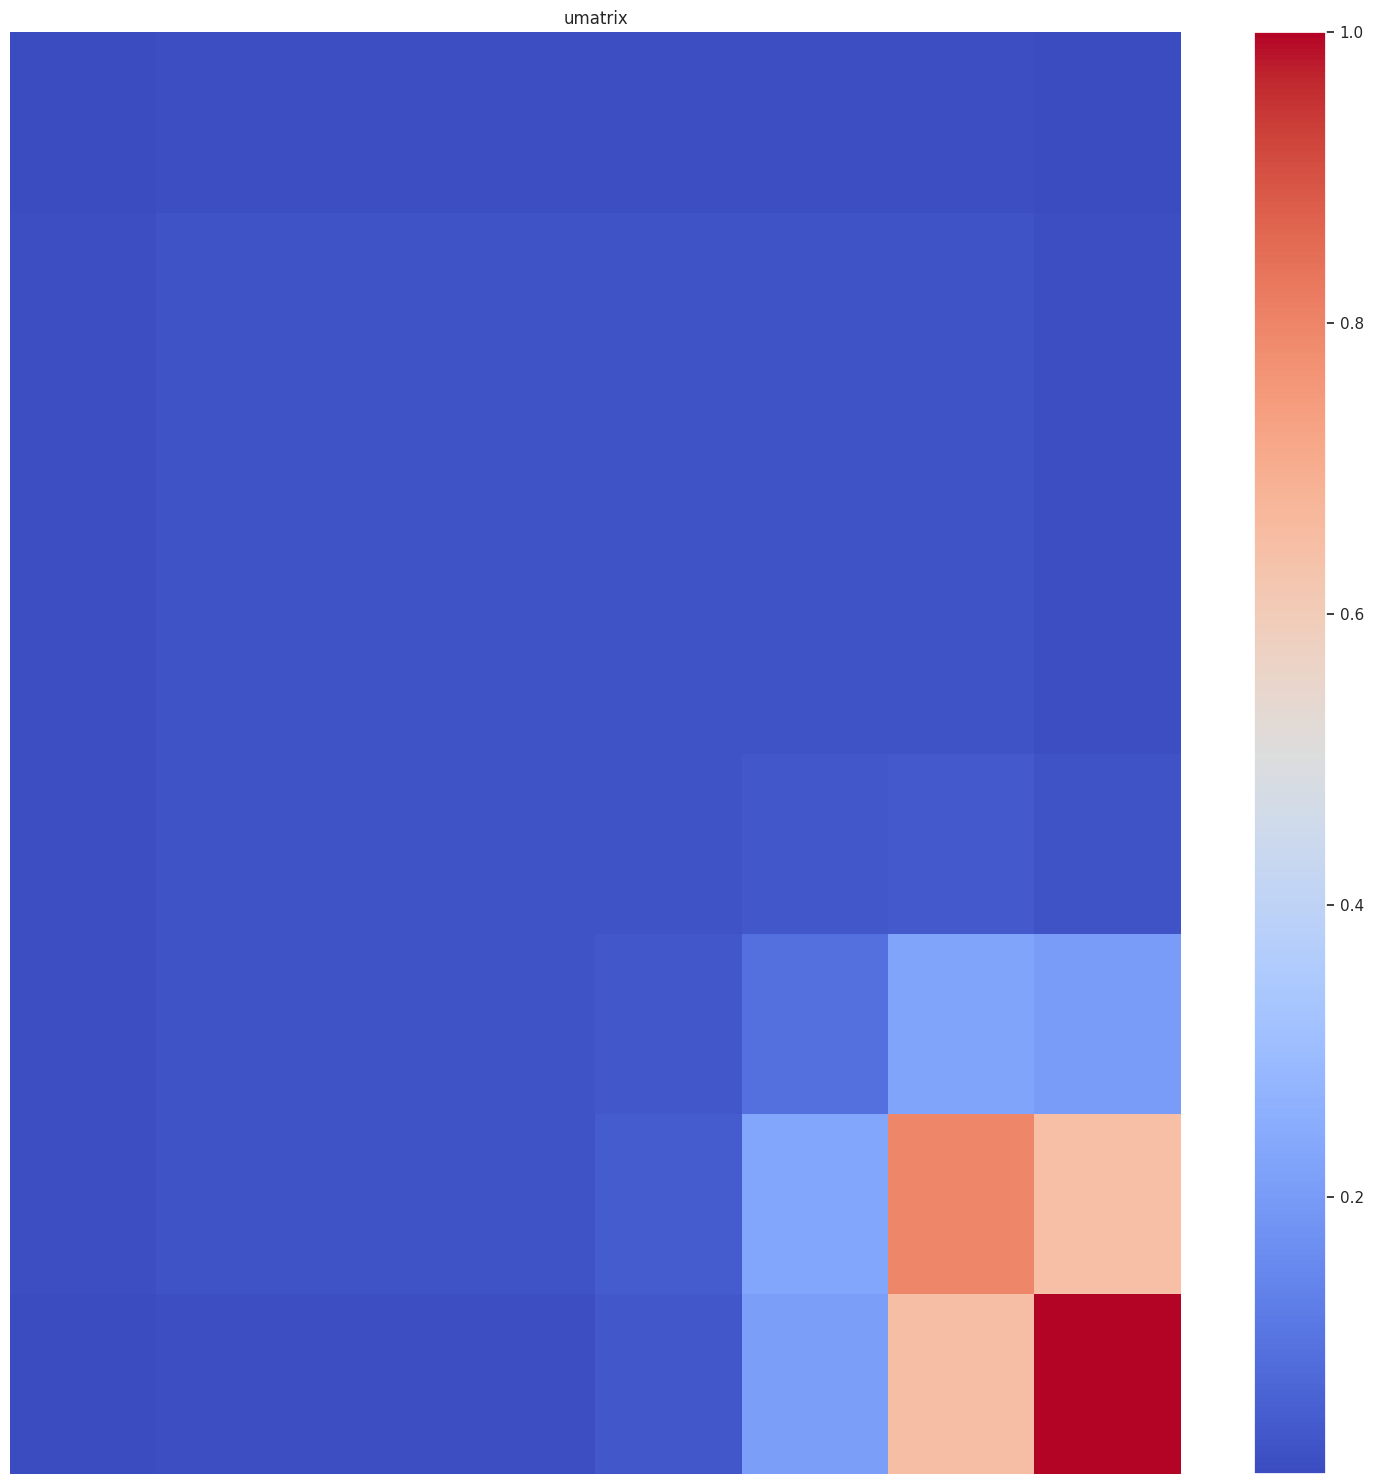

In [42]:
somN2.plot_umatrix()

Sem normalização o erro de quantização foi muito alto, ou seja,  não foi possivel separar os grupos.

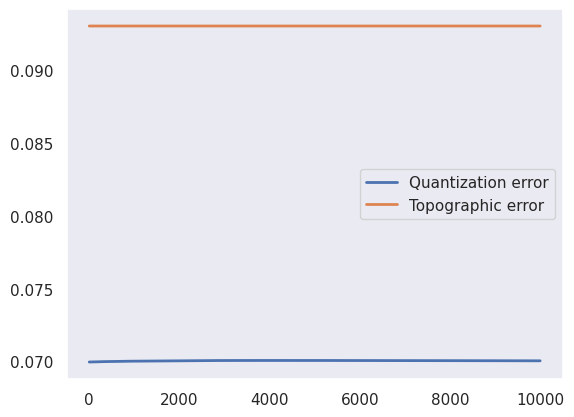

In [43]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

In [44]:
features_names = ['ResinaT3', 'Torixina', 'Triiodotironina', 'TSH', 'Diff_TSH']

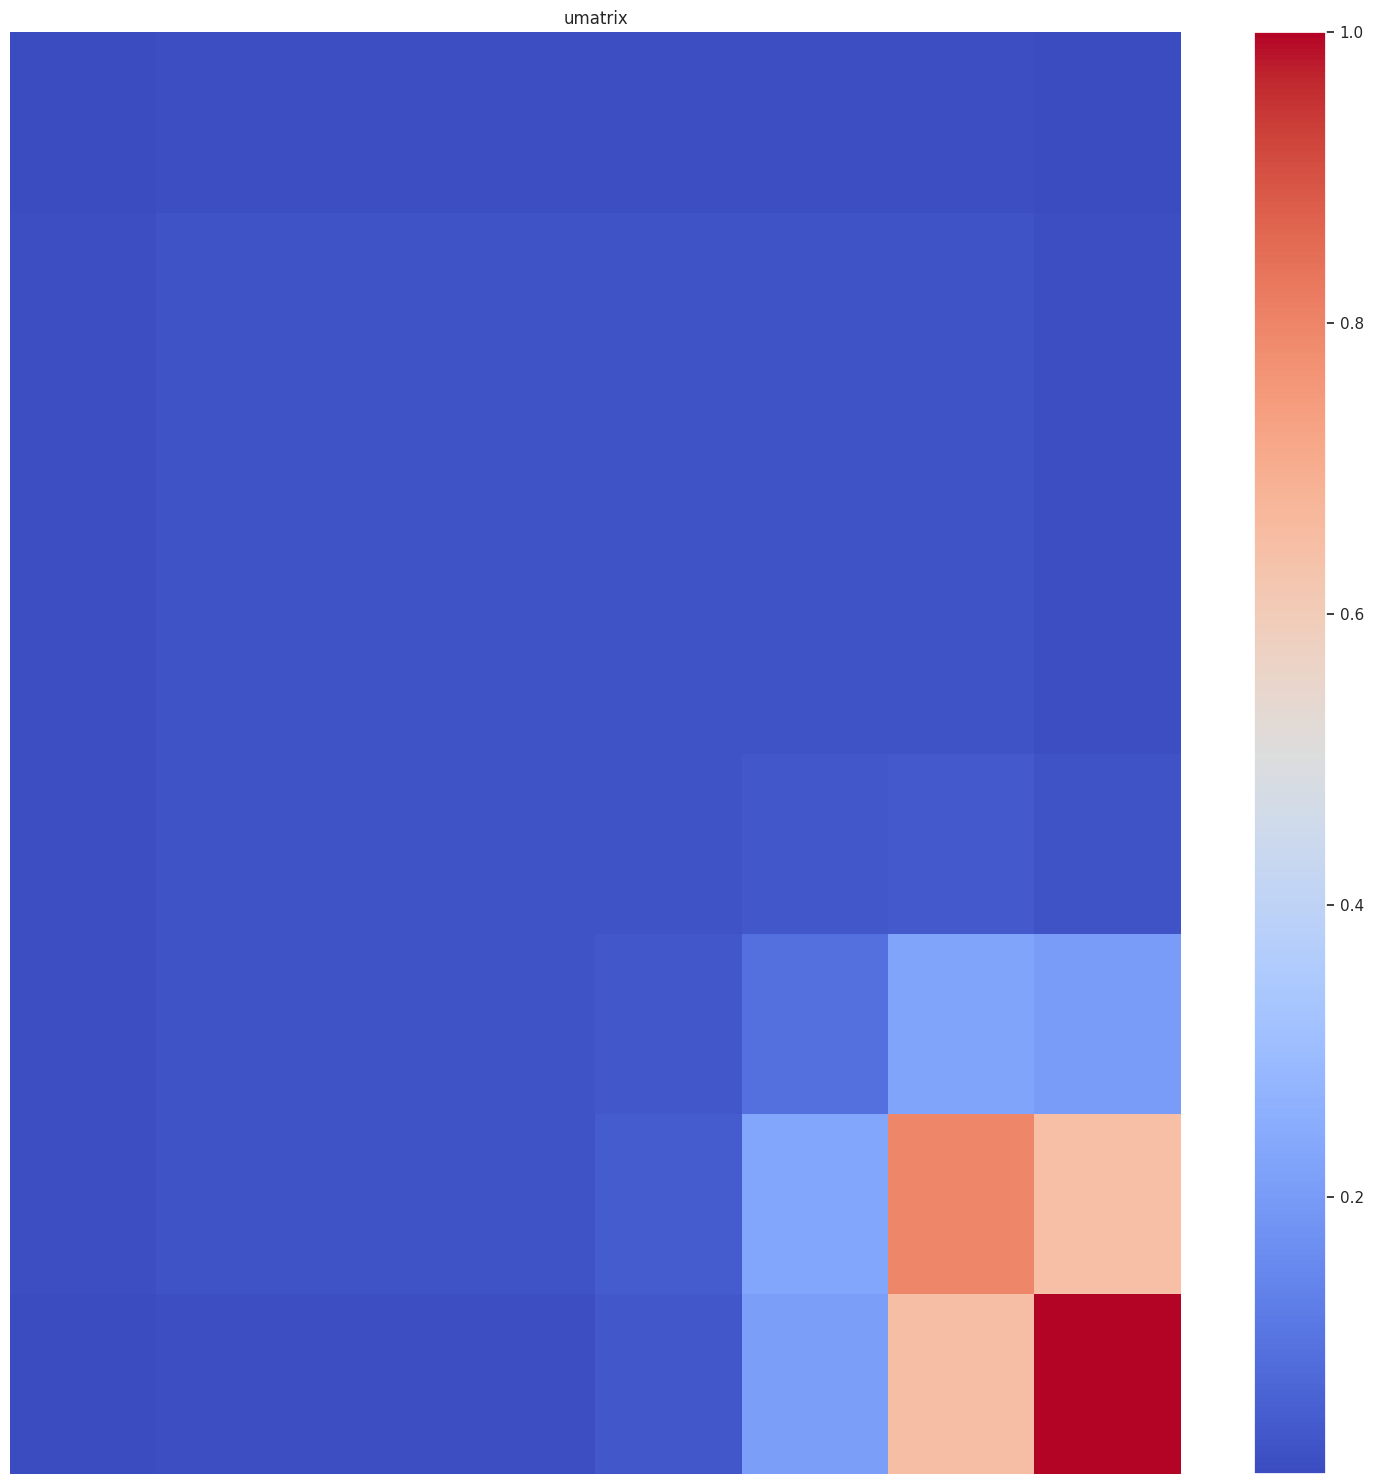

In [49]:
somN2.plot_umatrix()


Foram testados o comportamento usando duas normalizações diferentes e sem nenhuma normalização. Como esperado sem nenhuma normalização a rede não conseguiu aprender, o erro de quantização é enorme 63% e não é possivel separar os conjuntos.

##### 4. Modifique o processo de treinamento durante a fase de ordenação. Avalie o resultado gerado.

In [25]:
def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''

    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr



In [26]:
m = 8 #Dimensão X do mapa de Kohonen
n = 8 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.001 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0001 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000
finetuning_time = 10000
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

Alterando ordering time

In [47]:
ordering_time = [10,100,500,1000,1500,2000,2500,5000,7500,100000]
quantization_error = []
topographic_error = []


In [48]:
for y in range(0,len(ordering_time)):
  som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
  som.pca_weights_init(values)
  som.train_random(X, ordering_time[y], verbose=True)
  quantization_error.append(som._quantization_error)
  topographic_error.append(som._topographic_error)
resultado = dict(ordering_time = ordering_time,
                   topographic_error = topographic_error,
                   quantization_error = quantization_error)
resultado_df = pd.DataFrame(data=resultado)

 [ 10 / 10 ] 100% - 0:00:00 left 
 quantization error: 0.6189492186620903
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.600880169539454
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.5297915219980562
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.4470898388285778
 [ 1500 / 1500 ] 100% - 0:00:00 left 
 quantization error: 0.38023932568497154
 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 0.329119588696745
 [ 2500 / 2500 ] 100% - 0:00:00 left 
 quantization error: 0.29283021992080843
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.23695324182625302
 [ 7500 / 7500 ] 100% - 0:00:00 left 
 quantization error: 0.220092209264119
 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.10719709149854142


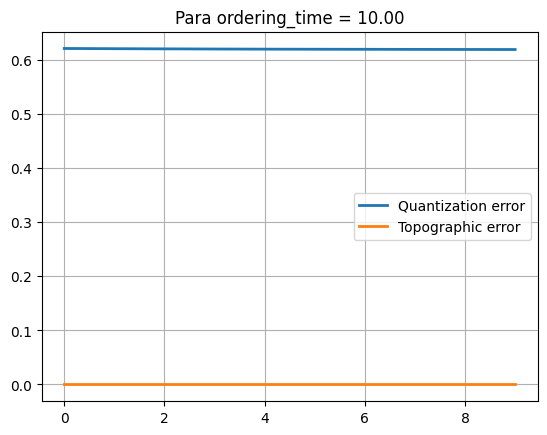

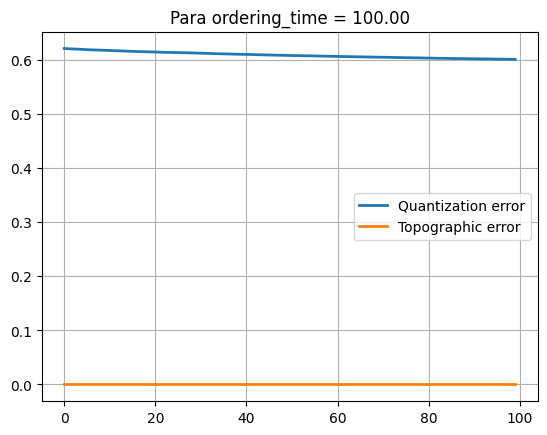

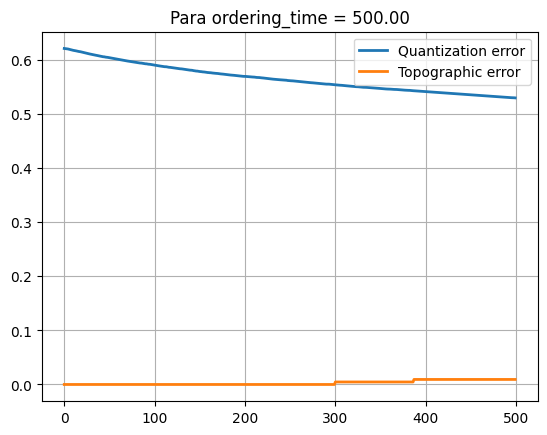

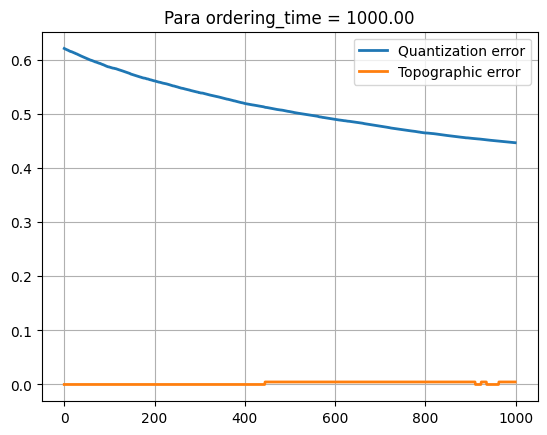

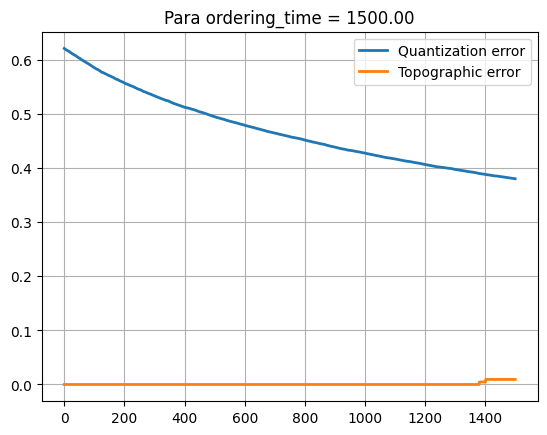

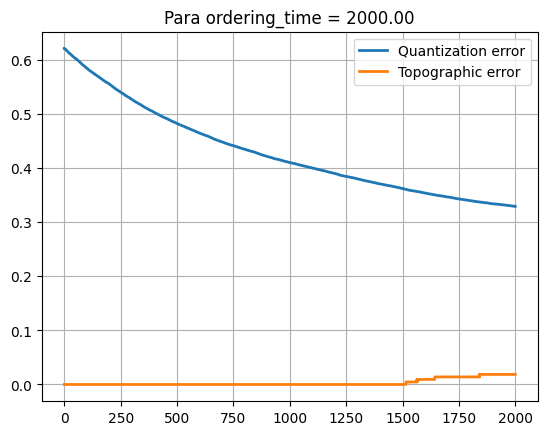

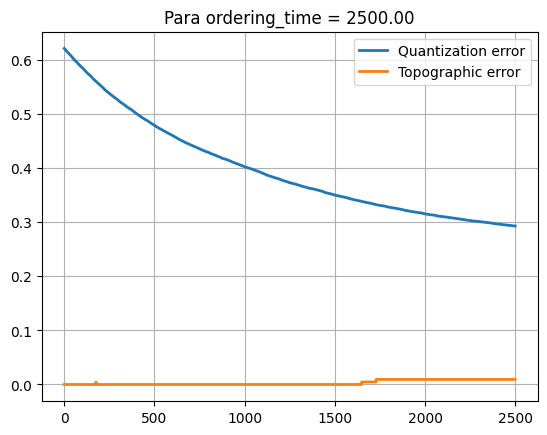

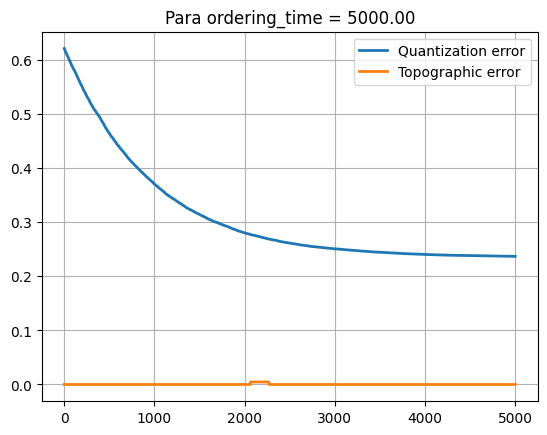

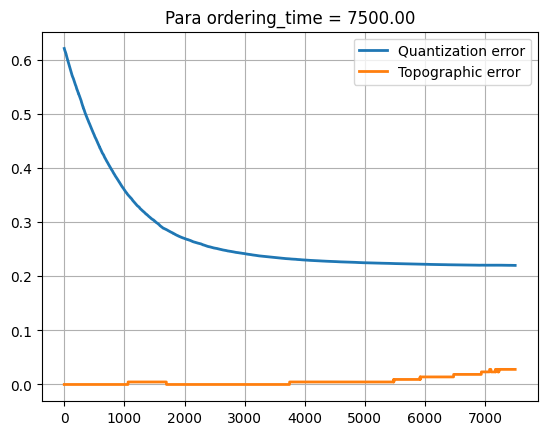

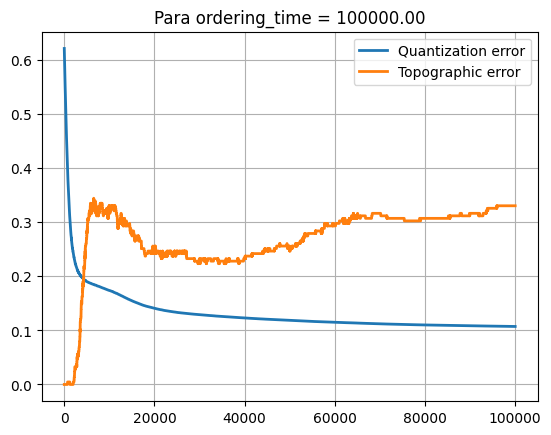

In [49]:
for i in range(len(resultado_df)):
  ord_time = ordering_time[i]
  quant_err = quantization_error[i]
  top_err = topographic_error[i]
  plt.figure()
  plt.plot(quant_err,linewidth=2)
  plt.plot(top_err,linewidth=2)
  plt.legend(['Quantization error','Topographic error'])
  plt.title("Para ordering_time = %.2f"%ord_time)
  plt.grid()

Quando o tempo de ordenação é pequeno, o mapa não consegue se organizar.

Conforme o tempo aumenta o mapa consegue se organizar melhor e o erro de quantização diminui, porém existe um limite de ganho no aumento desse tempo que para essa configuração, foi maior que 100000.

Modificando o lr_ordering

In [54]:
m = 8 #Dimensão X do mapa de Kohonen
n = 8 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.001 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0001 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000
finetuning_time = 10000
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

In [55]:
lr_ordering = [0.005,0.01,0.05,0.1,0.5,1]
quantization_error = []
topographic_error = []

In [56]:
for y in range(0,len(lr_ordering)):
  som = MiniSom(m,n,input_len,learning_rate=lr_ordering[y],topology=topology,decay_function=decay_fcn)
  som.pca_weights_init(values)
  som.train_random(X, ordering_time, verbose=True)
  quantization_error.append(som._quantization_error)
  topographic_error.append(som._topographic_error)
resultado = dict(learning_rate = lr_ordering[y],
                   topographic_error = topographic_error,
                   quantization_error = quantization_error)
resultado_df = pd.DataFrame(data=resultado)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.23683515100431718
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.19925514443289613
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.1286093551783753
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.10956293086000965
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.06931693014096876
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.06099567346060694


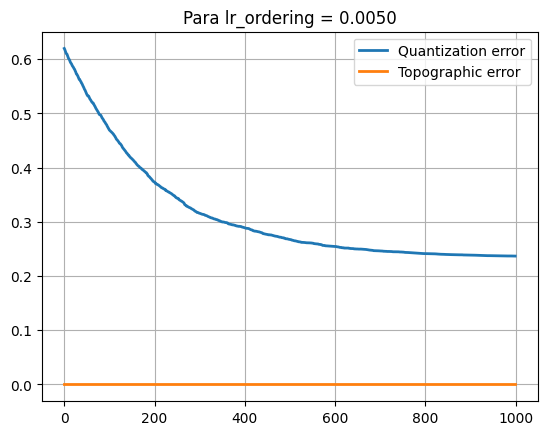

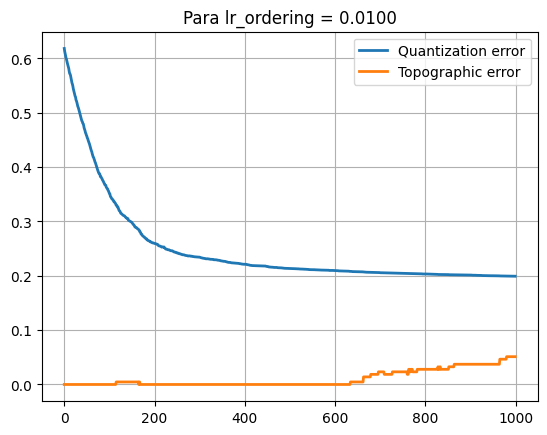

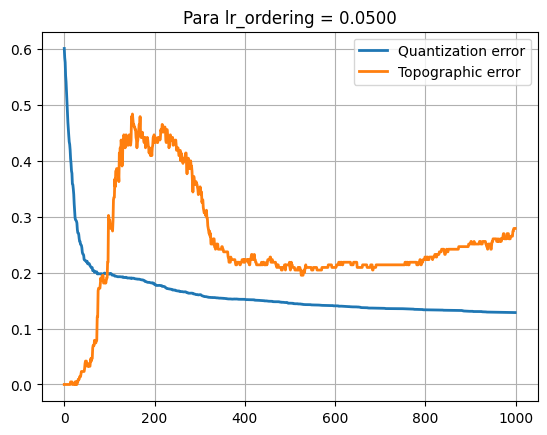

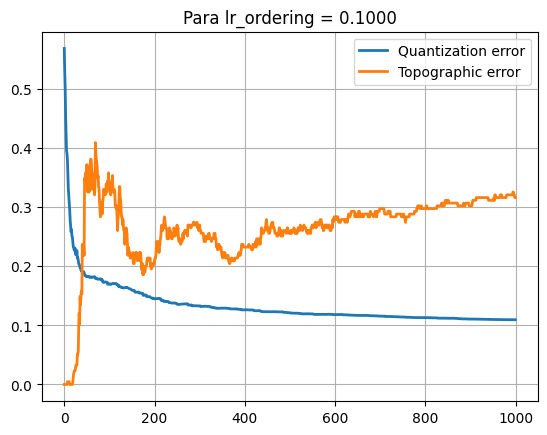

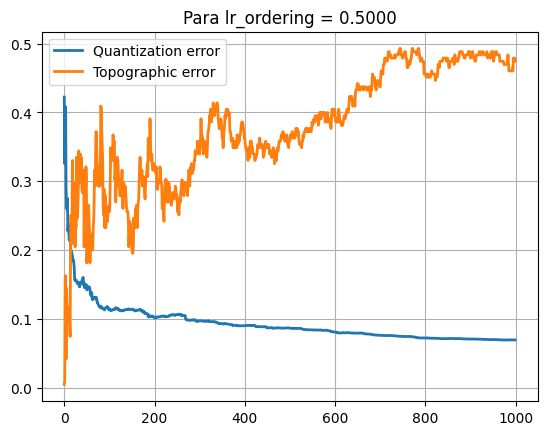

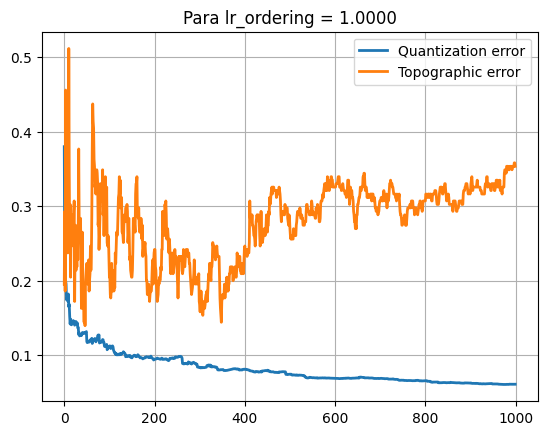

In [58]:
for i in range(len(resultado_df)):
  lr_order = lr_ordering[i]
  quant_err = quantization_error[i]
  top_err = topographic_error[i]
  plt.figure()
  plt.plot(quant_err,linewidth=2)
  plt.plot(top_err,linewidth=2)
  plt.legend(['Quantization error','Topographic error'])
  plt.title("Para lr_ordering = %.4f"%lr_order)
  plt.grid()

In [ ]:
Quando a taxa de ordenação se aproxima de 1 o erro de quantização diminui.

##### 5. Modifique o processo de treinamento durante a fase de ajuste fino. Avalie o resultado gerado.

In [61]:
m = 8 #Dimensão X do mapa de Kohonen
n = 8 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.001 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0001 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000
finetuning_time = 10000
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

In [62]:
finetuning_time = [5000,10000,15000,20000,25000,30000,40000,50000,100000]
quantization_error = []
topographic_error = []

In [63]:
for y in range(0,len(finetuning_time)):
  som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
  som.train_random(X, finetuning_time[y], verbose=True)
  quantization_error.append(som._quantization_error)
  topographic_error.append(som._topographic_error)

resultado = dict(finetuning_time = finetuning_time,
                   topographic_error = topographic_error,
                   quantization_error = quantization_error)
resultado_df = pd.DataFrame(data=resultado)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.06491054758910889
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.06491219932866162
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 0.06492027550708494
 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 0.06494568794632222
 [ 25000 / 25000 ] 100% - 0:00:00 left 
 quantization error: 0.06501445807777474
 [ 30000 / 30000 ] 100% - 0:00:00 left 
 quantization error: 0.0651411224709572
 [ 40000 / 40000 ] 100% - 0:00:00 left 
 quantization error: 0.06534252668801493
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.06563622095943006
 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.06630242167902846


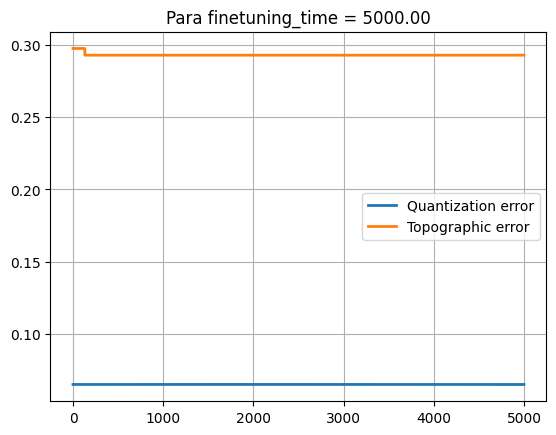

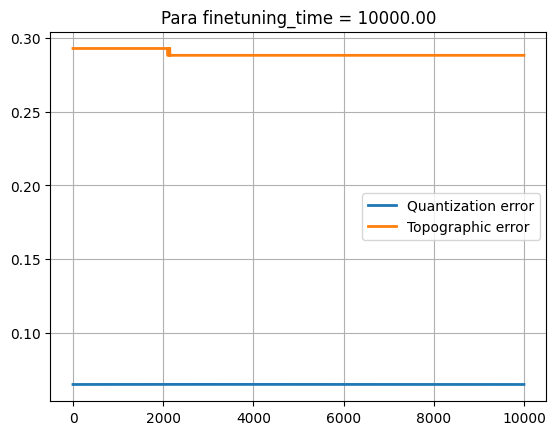

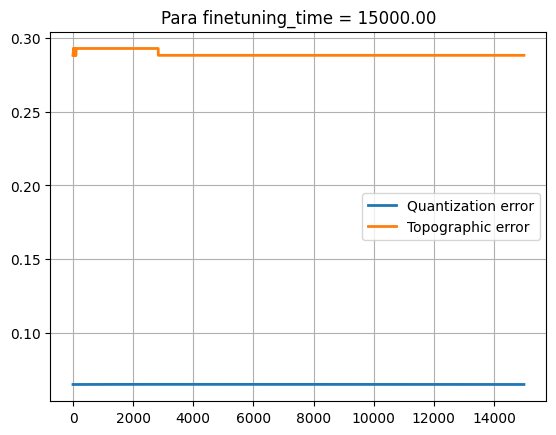

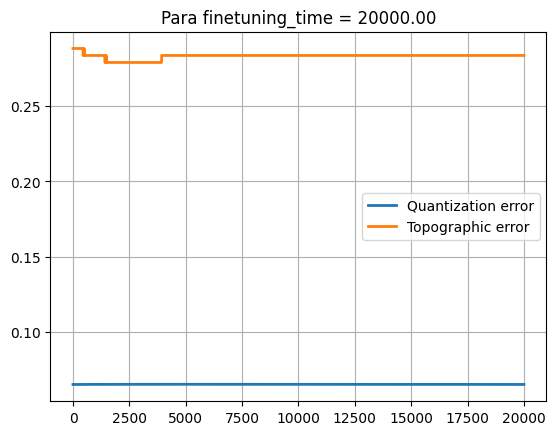

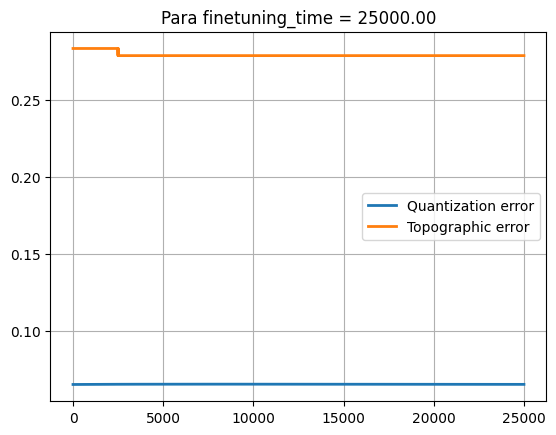

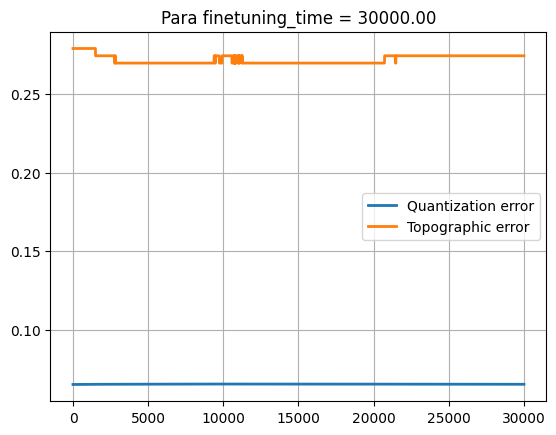

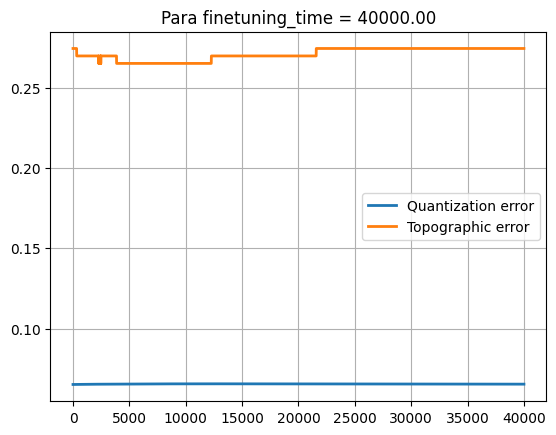

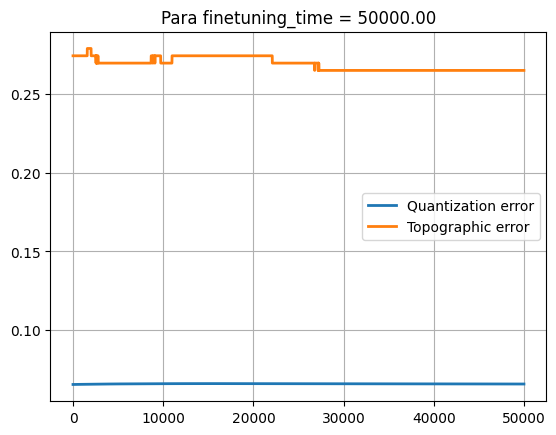

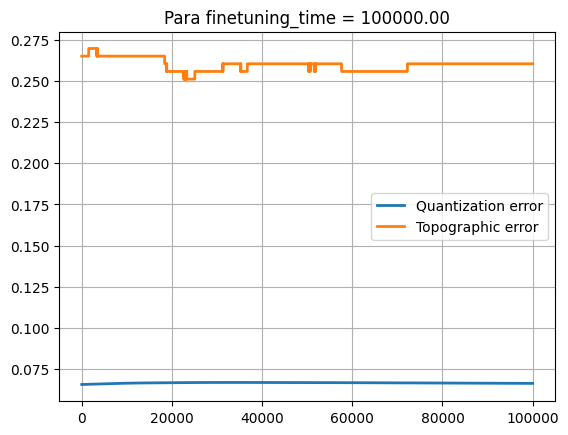

In [64]:
for i in range(len(resultado_df)):
  fin_timer = finetuning_time[i]
  quant_err = quantization_error[i]
  top_err = topographic_error[i]
  plt.figure()
  plt.plot(quant_err,linewidth=2)
  plt.plot(top_err,linewidth=2)
  plt.legend(['Quantization error','Topographic error'])
  plt.title("Para finetuning_time = %.2f"%fin_timer)
  plt.grid()

Não houve uma variação grande no erro de quantificação com o aumento do tempo de ajuste fino.

In [65]:
m = 8 #Dimensão X do mapa de Kohonen
n = 8 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.001 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0001 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000
finetuning_time = 10000
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

In [80]:
# lr_finetuning
lr_fine=[0.0005,0.001,0.005,0.01,0.05,0.1,1,2]
quantization_error = []
topographic_error = []

In [81]:
for y in range(0,len(lr_fine)):
  som._learning_rate = lr_fine[y] #Para mudar a taxa de aprendizado durante o período de finetuning
  som.train_random(X, finetuning_time, verbose=True)
  quantization_error.append(som._quantization_error)
  topographic_error.append(som._topographic_error)

resultado = dict(lr_finetuning = lr_fine,
                   topographic_error = topographic_error,
                   quantization_error = quantization_error)
resultado_df = pd.DataFrame(data=resultado)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 1823369282836545.8
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 7488577811688.995
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 8.467637980610107
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.2567933934947027
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.21986713640714917
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.14919281413372812
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.07487648215832696
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.054682157771562524


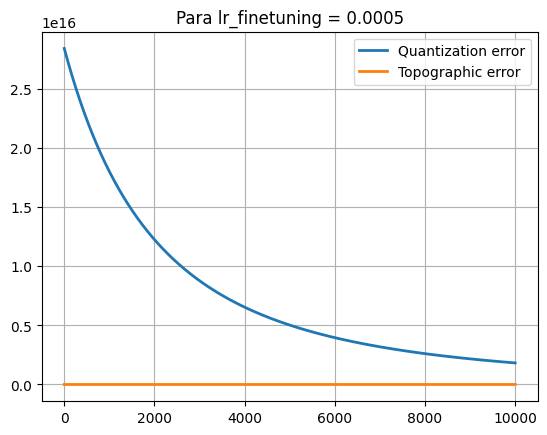

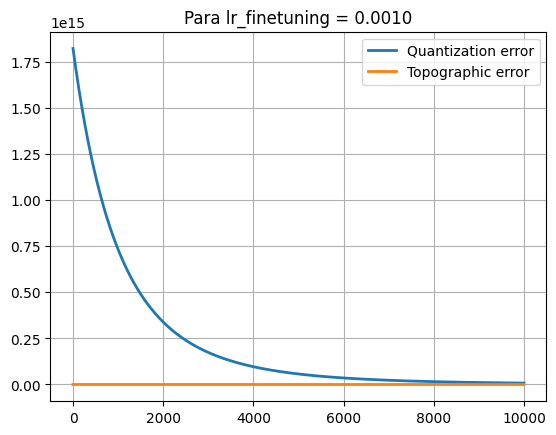

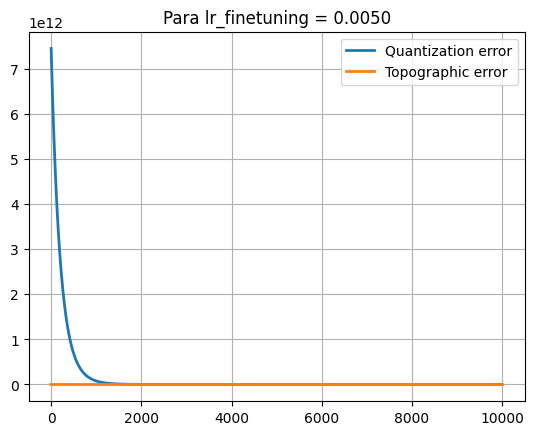

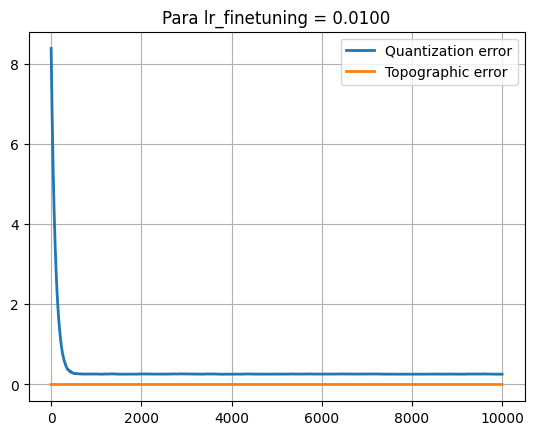

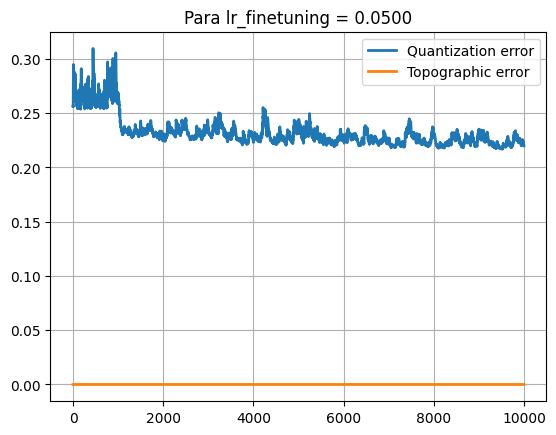

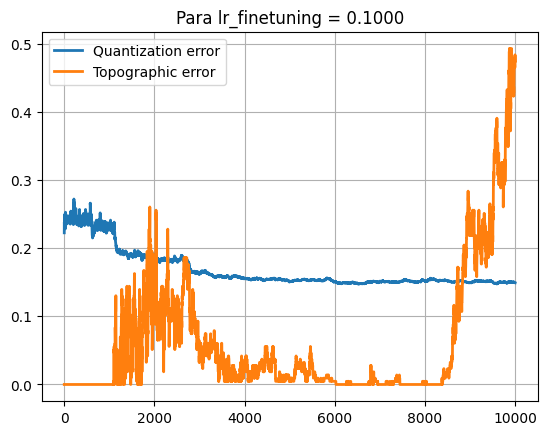

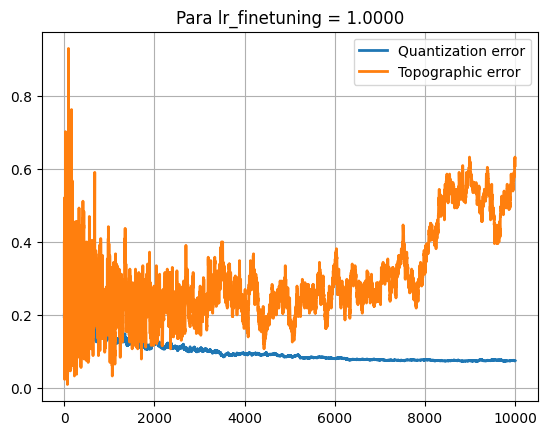

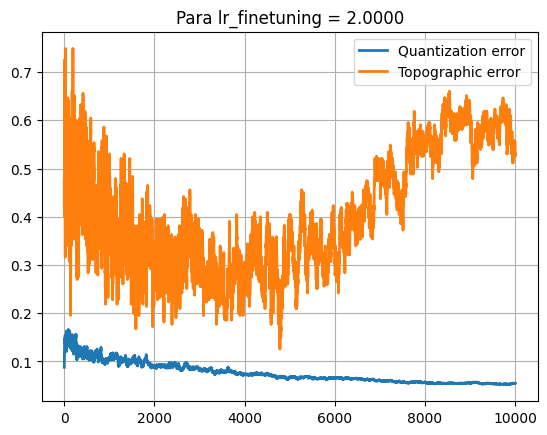

In [82]:
for i in range(len(resultado_df)):
  lr_finetuning = lr_fine[i]
  quant_err = quantization_error[i]
  top_err = topographic_error[i]
  plt.figure()
  plt.plot(quant_err,linewidth=2)
  plt.plot(top_err,linewidth=2)
  plt.legend(['Quantization error','Topographic error'])
  plt.title("Para lr_finetuning = %.4f"%lr_finetuning)
  plt.grid()

Para essa configuração de rede o lr_finetuning igual a 0.005 convergiu o erro rapidamente para muito próximo de zero.

##### 6. Modifique a função de decaimento da taxa de aprendizado. Esta mudança gera algum impacto no mapa gerado? Justifique

In [93]:
#decay function

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    decay_rate = 0.1  # Taxa de decaimento

    new_lr = lr/(1 - actual_t/max_t) ** decay_rate

    return new_lr

In [94]:
m = 8 #Dimensão X do mapa de Kohonen
n = 8 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.001 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0001 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000
finetuning_time = 10000
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

In [95]:
som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.3153560488391821


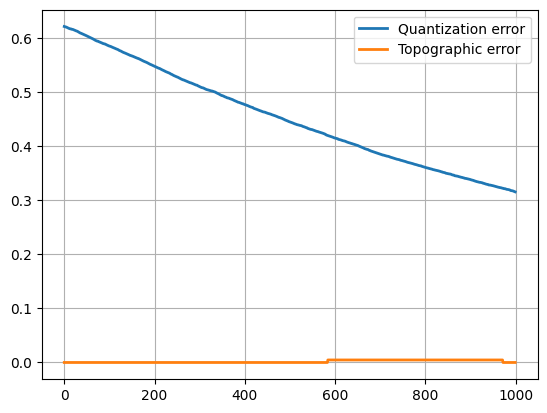

In [96]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

In [97]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning

som.train_random(X, finetuning_time, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.22590652567534422


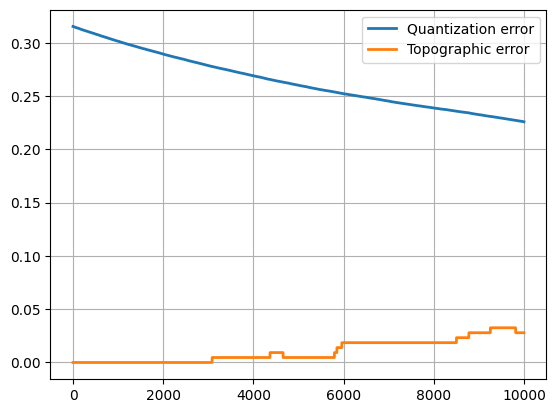

In [98]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

Foi feita uma função exponencial de decaimento onde se  utiliza uma taxa de decaimento e colocando essa taxa como expoente da função gerada. No teste gerado houve uma grande queda do erro quantitativo enquanto o erro topográfico diminuiu muito pouco na primeira função do decaimento.

##### 7. Altere a função de vizinhança. Avalie o resultado.

In [6]:
#decay function

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''

    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 8 #Dimensão X do mapa de Kohonen
n = 8 #Dimensão Y do mapa de Kohonen
lr_ordering = 0.001 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0001 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000
finetuning_time = 10000
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

In [7]:
neighborhood_function = ['gaussian','mexican_hat','bubble','triangle']
quantization_error = []
topographic_error = []

In [8]:
for y in range(0,len(neighborhood_function)):
  som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn,neighborhood_function=neighborhood_function[y])
  som.pca_weights_init(values)
  som.train_random(X, ordering_time, verbose=True)
  quantization_error.append(som._quantization_error)
  topographic_error.append(som._topographic_error)

resultado = dict(neighborhood_function = neighborhood_function,
                   topographic_error = topographic_error,
                   quantization_error = quantization_error)
resultado_df = pd.DataFrame(data=resultado)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.44714375602464773
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.44630565251066057
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.4488195105469753
 [   32 / 1000 ]   3% - 0:00:04 left 

/content/minisom/minisom.py:206: UserWarning: triangle neighborhood function does not take in account hexagonal topology
  warn('triangle neighborhood function does not ' +


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.5531326060868412


A troca da função de vizinhanha não demostrou aqui uma melhoria no erro de quantização, para triangular o erro foi pior: 0.55 em comparação aos outros 0.44.

In [9]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning

som.train_random(X, finetuning_time, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.4794901989482517


Alterando a taxa de aprendizado, para a vizihança triangular melhorou para 0.47.

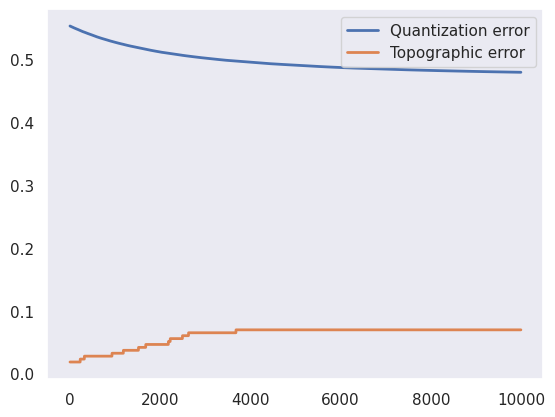

In [10]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

Há um aumento no erro de quantização quando estamos utilizando a função de vizinhaça triangulo para o treinamento da base no SOM.
Enquanto as outras funções de vizinhaças temos pouca diferenciação no erro

## Parte 2 - Análise dos mapas

##### 1. Teste novas configurações para o modelo SOM para obter um melhor resultado. Justifique a escolha dos parâmetros do modelo selecionado.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
import concurrent.futures
import time
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig

In [19]:
#decay function

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''

    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


In [47]:

m = 8 #Dimensão X do mapa de Kohonen
n = 8 #Dimensão Y do mapa de Kohonen
lr_ordering = 1.0 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0005 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000
finetuning_time = 10000
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

In [48]:
som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.0641167644230319


In [52]:
print( f'Topographic error:    {som._topographic_error[-1]}')

Topographic error:    0.38604651162790693


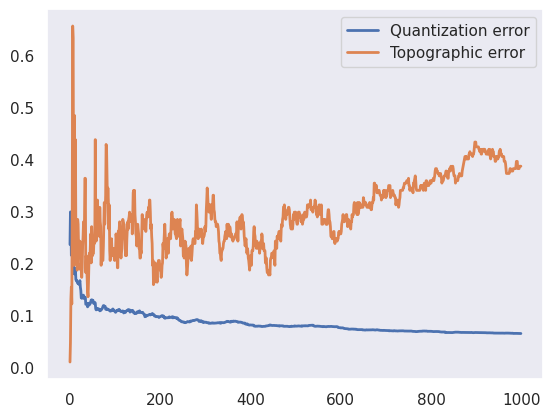

In [50]:
plt.figure()#figsize=(10,6))
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()
plt.show()

0.28867513459481287


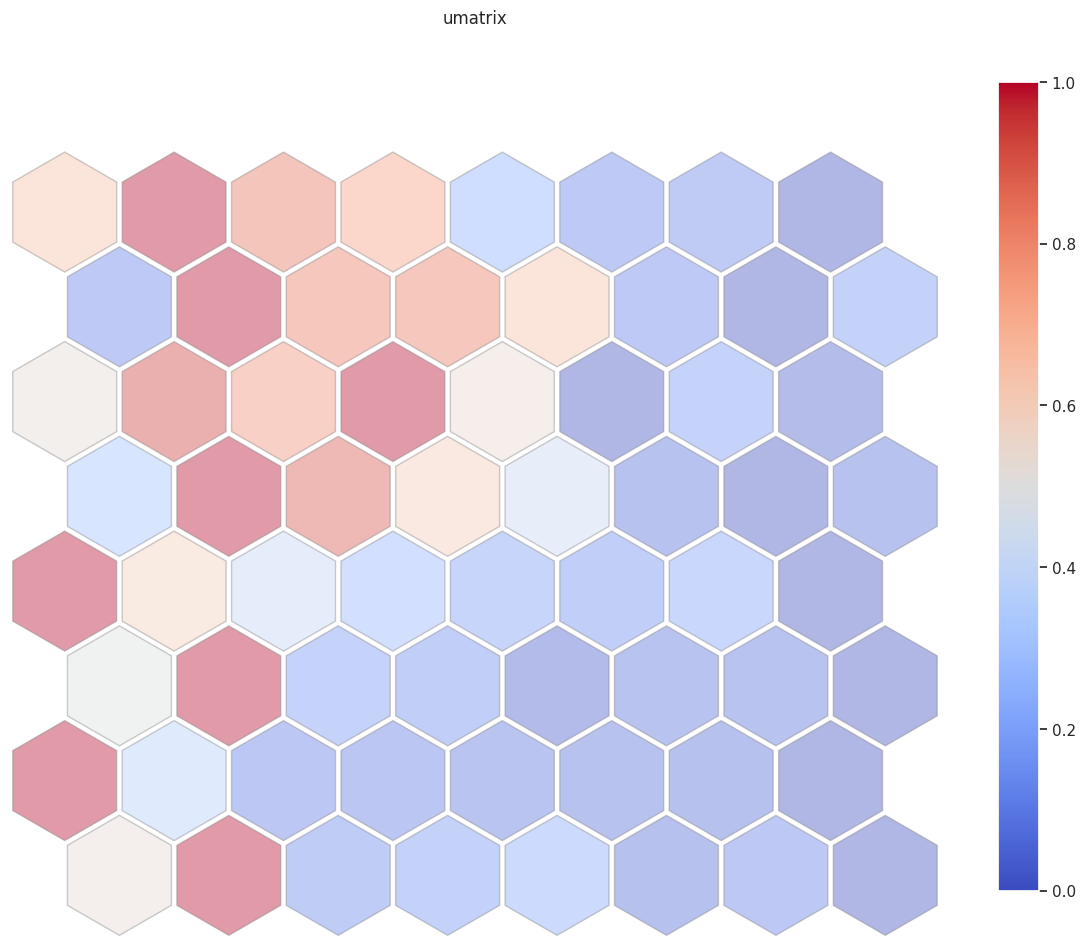

In [53]:
som.plot_umatrix()

A configuração da rede utilizada no treinamento foi a seguinte: topologia rectangular; dimensão 8x8;foi utilizado um hiper parâmetro para sigma e learning rate; função de vizinhança gaussiana;

##### 2. Utilizando a melhor configuração do item anterior, analise os diferentes mapas fornecidos e caracterize os grupos de pacientes obtidos.

<ipython-input-54-3b2e8b0fbdd6>:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),


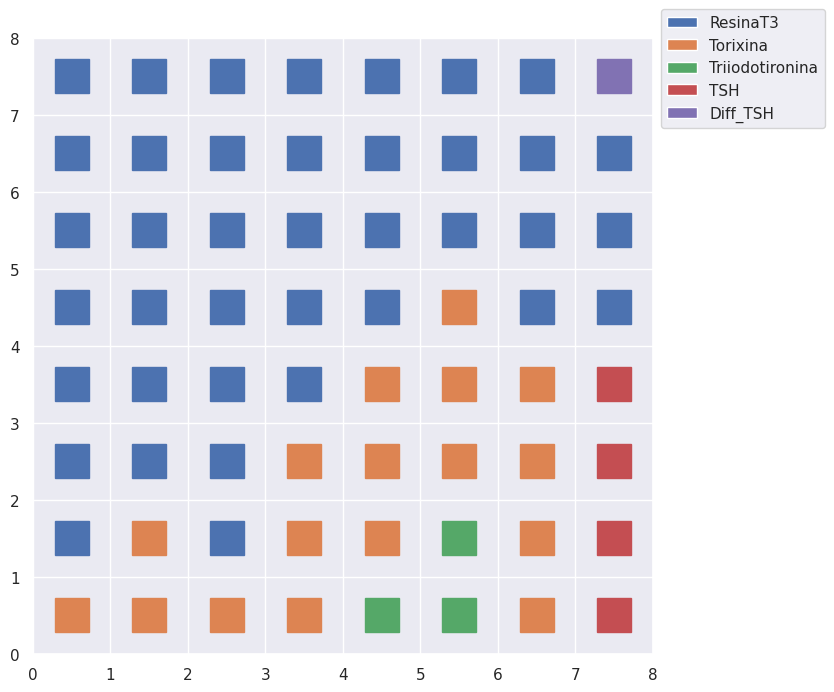

In [54]:
Z = np.zeros((m, n))
W = som.get_weights()
from matplotlib.patches import Patch
features_names = ['ResinaT3', 'Torixina', 'Triiodotironina', 'TSH', 'Diff_TSH']

plt.figure(figsize=(8, 8))
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='s', markersize=24)

legend_elements = [Patch(facecolor='C'+str(i),
                         edgecolor='w',
                         label=f) for i, f in enumerate(features_names)]

plt.legend(handles=legend_elements,
           loc='center left',
           bbox_to_anchor=(1, .95))

plt.xlim([0, m])
plt.ylim([0, n])
plt.show()

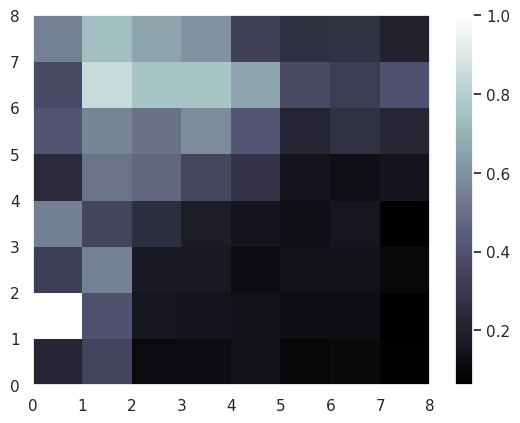

In [55]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T)       # Distance map as background
colorbar()
show()

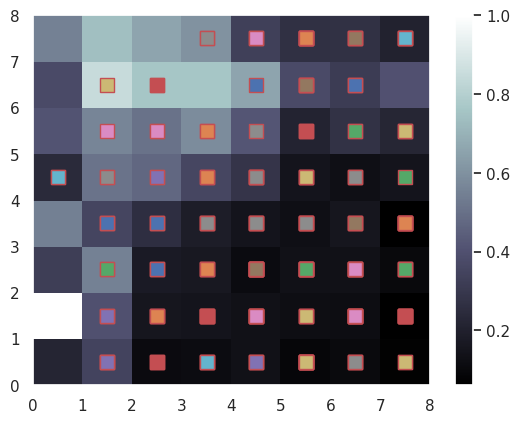

In [56]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = 's'
colors = 'r'
for i,x in enumerate (X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers,
       markeredgecolor = colors,
       markersize = 10)
show()

In [57]:
dataset['target'].value_counts()

1.0    150
2.0     35
3.0     30
Name: target, dtype: int64

In [60]:
dataset.groupby('target')['Triiodotironina'].value_counts(bins=3).sort_index(ascending=False)

target  Triiodotironina          
3.0     (1.733, 2.5]                  5
        (0.967, 1.733]               11
        (0.197, 0.967]               14
2.0     (7.2, 10.0]                   5
        (4.4, 7.2]                    8
        (1.5910000000000002, 4.4]    22
1.0     (2.2, 3.1]                   24
        (1.3, 2.2]                   94
        (0.396, 1.3]                 32
Name: Triiodotironina, dtype: int64

In [58]:
dataset.groupby('target')['Torixina'].value_counts(bins=3).sort_index(ascending=False)

target  Torixina                  
3.0     (4.7, 6.8]                     9
        (2.6, 4.7]                    10
        (0.493, 2.6]                  11
2.0     (20.567, 25.3]                 9
        (15.833, 20.567]              14
        (11.085, 15.833]              12
1.0     (12.133, 16.1]                13
        (8.167, 12.133]               85
        (4.186999999999999, 8.167]    52
Name: Torixina, dtype: int64

In [61]:
dataset.groupby('target')['TSH'].value_counts(bins=3).sort_index(ascending=False)

target  TSH                       
3.0     (38.0, 56.4]                   2
        (19.6, 38.0]                   3
        (1.1440000000000001, 19.6]    25
2.0     (1.233, 1.8]                   9
        (0.667, 1.233]                18
        (0.0973, 0.667]                8
1.0     (2.567, 3.7]                   3
        (1.433, 2.567]                51
        (0.296, 1.433]                96
Name: TSH, dtype: int64

In [62]:
dataset.groupby('target')['Diff_TSH'].value_counts(bins=3).sort_index(ascending=False)

target  Diff_TSH      
3.0     (38.0, 56.3]        5
        (19.7, 38.0]        5
        (1.344, 19.7]      20
2.0     (0.2, 0.6]         10
        (-0.2, 0.2]        14
        (-0.602, -0.2]     11
1.0     (8.9, 13.7]         1
        (4.1, 8.9]         25
        (-0.715, 4.1]     124
Name: Diff_TSH, dtype: int64

In [59]:
dataset.groupby('target')['ResinaT3'].value_counts(bins=3).sort_index(ascending=False)

target  ResinaT3                    
3.0     (126.333, 141.0]                 8
        (111.667, 126.333]              18
        (96.955, 111.667]                4
2.0     (117.667, 144.0]                 3
        (91.333, 117.667]               16
        (64.92, 91.333]                 16
1.0     (118.667, 133.0]                23
        (104.333, 118.667]              94
        (89.95599999999999, 104.333]    33
Name: ResinaT3, dtype: int64